## Problem 1: Convolutional Autoencoder
In this problem, we want to create a model that generates dog images using convolutional autoencoder.

(1) Load dog dataset.

Divide the pixel of the image into 255.

In [1]:
import glob
import numpy as np

import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split

from itertools import product
import matplotlib.pyplot as plt
%matplotlib inline

2021-11-24 13:23:33.605978: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [16]:
tf.test.is_built_with_cuda()

True

In [3]:
norm_dog_imgs = [cv2.imread(file) / 255.0 for file in glob.glob(
    './PS08_data_files/images/*.png', recursive=True)]

print('Found {} images belonging to 1 class.'.format(len(norm_dog_imgs)))

Found 10000 images belonging to 1 class.


In [4]:
train_imgs, test_imgs = train_test_split(norm_dog_imgs, test_size=0.2)
train_imgs = np.array(train_imgs).reshape(-1, 64, 64, 3)
test_imgs = np.array(test_imgs).reshape(-1, 64, 64, 3)

In [5]:
train_imgs.shape, test_imgs.shape

((8000, 64, 64, 3), (2000, 64, 64, 3))

(2) Design and train autoencoder architecture using convolutional layer

In [10]:
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                           strides=(2, 2), padding='SAME', 
                           activation='relu', input_shape=(64, 64, 3)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                           strides=(2, 2), padding='SAME', 
                           activation='relu', input_shape=(32, 32, 32)),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), 
                           strides=(2, 2), padding='SAME', 
                           activation='relu', input_shape=(16, 16, 64)),
    
    tf.keras.layers.Conv2D(filters=100, kernel_size=(6, 6), padding='VALID', 
                           activation='relu', input_shape=(8, 8, 128))])

In [11]:
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(6, 6), 
                                    strides=(1, 1), padding='VALID', 
                                    activation='relu', input_shape=(3, 3, 100)),
    
    tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), 
                                    strides=(2, 2), padding='SAME', 
                                    activation='relu', input_shape=(8, 8, 128)),

    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), 
                                    strides=(2, 2), padding='SAME', 
                                    activation='relu', input_shape=(16, 16, 64)),

    tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(3, 3), 
                                    strides=(2, 2), padding='SAME', 
                                    activation='relu', input_shape=(32, 32, 32))])

In [12]:
encoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 100)         460900    
Total params: 554,148
Trainable params: 554,148
Non-trainable params: 0
_________________________________________________________________


In [13]:
decoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_8 (Conv2DTr (None, 8, 8, 128)         460928    
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 16, 16, 64)        73792     
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 32, 32, 32)        18464     
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 64, 64, 3)         867       
Total params: 554,051
Trainable params: 554,051
Non-trainable params: 0
_________________________________________________________________


In [14]:
latent = encoder.output
result = decoder(latent)

model = tf.keras.Model(inputs=encoder.input, outputs=result)
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(train_imgs, train_imgs, epochs=20)

2021-11-24 13:25:13.892195: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-24 13:25:13.893282: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3100000000 Hz


Epoch 1/20


2021-11-24 13:25:14.588999: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-11-24 13:25:19.040925: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-11-24 13:25:19.940216: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2021-11-24 13:25:26.472349: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


250/250 [==============================] - 146s 18ms/step - loss: 0.0588
Epoch 2/20
250/250 [==============================] - 5s 20ms/step - loss: 0.0111
Epoch 3/20
250/250 [==============================] - 4s 15ms/step - loss: 0.0086
Epoch 4/20
250/250 [==============================] - 4s 17ms/step - loss: 0.0074
Epoch 5/20
250/250 [==============================] - 5s 21ms/step - loss: 0.0063
Epoch 6/20
250/250 [==============================] - 5s 20ms/step - loss: 0.0050
Epoch 7/20
250/250 [==============================] - 5s 21ms/step - loss: 0.0052
Epoch 8/20
250/250 [==============================] - 5s 21ms/step - loss: 0.0045
Epoch 9/20
250/250 [==============================] - 5s 21ms/step - loss: 0.0051
Epoch 10/20
250/250 [==============================] - 5s 20ms/step - loss: 0.0042
Epoch 11/20
250/250 [==============================] - 5s 19ms/step - loss: 0.0040
Epoch 12/20
250/250 [==============================] - 4s 18ms/step - loss: 0.0040
Epoch 13/20
250/250 [=

(3) Choose 5 random images and plot the original and reconstructed images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


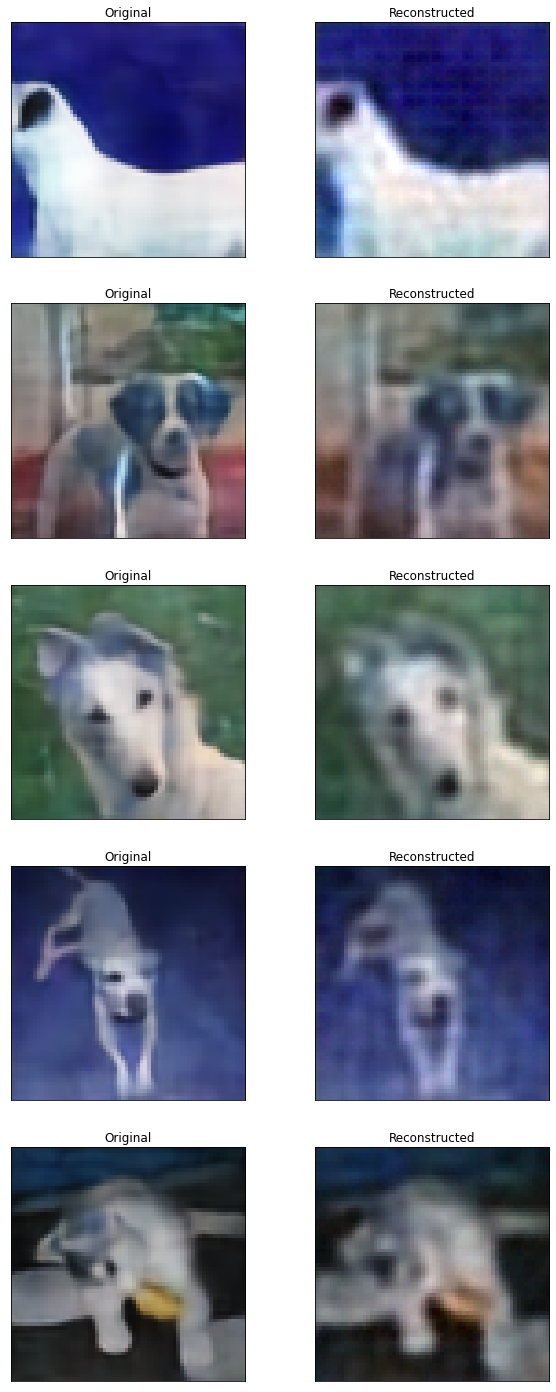

In [18]:
fig, axes = plt.subplots(5, 2, figsize=(10, 25))
fig.set_facecolor('white')

for i, j in product(range(5), range(2)):    
    if j == 0:
        rand_num = np.random.randint(len(test_imgs))
        x_reconst = model.predict(test_imgs[[rand_num]])
    
        img_selected = test_imgs[rand_num]
        img_title = 'Original'
    
    else:
        img_selected = x_reconst.reshape(64, 64, 3)
        img_title = 'Reconstructed'
    
    axes[i, j].imshow(img_selected)
    axes[i, j].set_title(img_title)
    axes[i, j].set_xticks([])
    axes[i, j].set_yticks([])

(4) Load data of white dog and black dog. \
Download images of black dog and white dog. \
Resize each image to (64, 64, 3)

In [19]:
white_dog = cv2.imread('./PS08_data_files/white_dog.PNG') / 255.0
black_dog = cv2.imread('./PS08_data_files/black_dog.PNG') / 255.0

white_dog = cv2.resize(white_dog, (64, 64))
black_dog = cv2.resize(black_dog, (64, 64))

In [20]:
white_dog.shape, black_dog.shape

((64, 64, 3), (64, 64, 3))

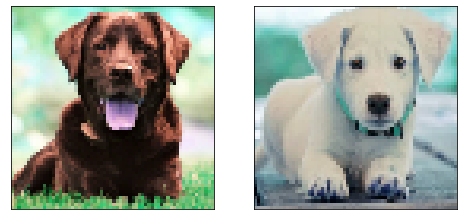

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(8, 16))
fig.set_facecolor('white')

for i in range(2):
    img_chosen = black_dog if i == 0 else white_dog
    axes[i].imshow(img_chosen)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

(5-1) Imshow the average pixel image of the black dog and white dog images.

(5-2) Imshow the decoded image, after averaging white dog and black dog in latent space.

In [22]:
white_dog_encoded = encoder.predict(white_dog.reshape(-1, 64, 64, 3))
black_dog_encoded = encoder.predict(black_dog.reshape(-1, 64, 64, 3))
latent_average_dog = (white_dog_encoded + black_dog_encoded) / 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


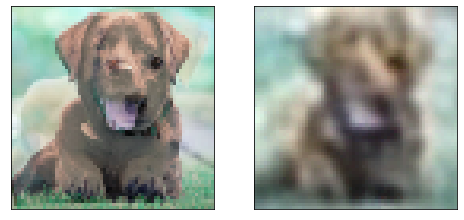

In [23]:
average_dog = (white_dog + black_dog) / 2
reconst_dog = decoder.predict(latent_average_dog)

fig, axes = plt.subplots(1, 2, figsize=(8, 16))
fig.set_facecolor('white')

for i in range(2):
    img_chosen = average_dog if i == 0 else reconst_dog.reshape(64, 64, 3)
    axes[i].imshow(img_chosen)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

(6) Explain the reason for the difference between the two images in terms of latent space.

Since the model learned by leaving only important information on the image in the encoder and removing the remaining information, feature extraction occurred in the output of the encoded white dog and black dog, respectively. Therefore, on the premise that learning was well done, the image restored to the average value of data points in the late space would be an image that naturally mixes white dog and black dog. For this reason, the image decoded with the average value of these two and the image simply averaged the pixels of the original image are inevitably different.

## Problem 2: Load VGG Network
We studied FCN model with VGG16 network in class. Implement your FCN model using VGG19 network for encoder part of model and test it. I recommend to use colab rather than your laptop. 

Download data from here 

We are going to use a pre-trained VGG network (Problem 2) and apply the FCN model  (problem 3).

(1) Load segmented data using numpy.load function and print data shape.

- images_training.npy
- seg_training.npy
- images_testing.npy

In [24]:
img_train = np.load('./PS08_data_files_segmentation/images_training.npy')
img_test = np.load('./PS08_data_files_segmentation/images_testing.npy')
seg_train = np.load('./PS08_data_files_segmentation/seg_training.npy')

print('The number of training images: {}, shape: {}'.format(len(img_train), img_train.shape))
print('The number of testing images: {}, shape: {}'.format(len(img_test), img_test.shape))

The number of training images: 289, shape: (289, 160, 576, 3)
The number of testing images: 290, shape: (290, 160, 576, 3)


(2) Plot random image of train data set.

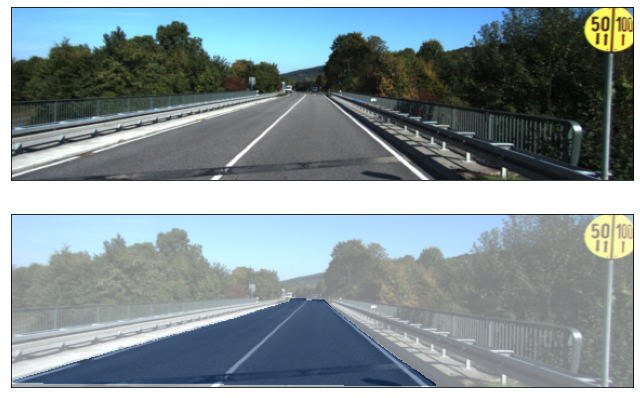

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(14, 7))
fig.set_facecolor('white')

rand_num = np.random.choice(img_train.shape[0])
seg_mask = (seg_train[rand_num, :, :, 1] > 0.5).reshape(160, 576, 1).astype(float)

axes[0].imshow(img_train[rand_num])
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(img_train[rand_num])
axes[1].imshow(seg_mask, cmap='Blues', alpha=0.5)
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

(3) Load VGG19 network and print model structure.

In [63]:
model_type = tf.keras.applications.vgg19
base_model = model_type.VGG19(weights='imagenet', 
                              include_top=False)
base_model.trainable = False
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

## Problem 3: FCN Model
Now, we've got pre-trained weights and biases. In this problem, we are going to use the weights and biases from problem 2.

(1) Define your FCN model using the weights and biases in problem 2-(3).

In [64]:
map5 = base_model.layers[-1].output

# sixth convolution layer
conv6 = tf.keras.layers.Conv2D(filters=4096, kernel_size=(2, 2),
                               padding='SAME', activation='relu')(map5)

# 1x1 convolution layers
fcn4 = tf.keras.layers.Conv2D(filters=4096, kernel_size=(1, 1),
                              padding='SAME', activation='relu')(conv6)

fcn3 = tf.keras.layers.Conv2D(filters=2, kernel_size=(1, 1),
                              padding='SAME', activation='relu')(fcn4)

# Upsampling layers
fcn2 = tf.keras.layers.Conv2DTranspose(filters=512, kernel_size=(4, 4),
                                       strides=(2, 2), padding='SAME')(fcn3)

fcn1 = tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=(8, 8),
                                       strides=(2, 2), padding='SAME')(
    fcn2 + base_model.layers[16].output)

output = tf.keras.layers.Conv2DTranspose(filters=2, kernel_size=(32, 32),
                                         strides=(8, 8), padding='SAME',
                                         activation='softmax')(
    fcn1 + base_model.layers[11].output)

model = tf.keras.Model(inputs=base_model.inputs, outputs=output)

In [65]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
____________________________________________________________________________________________

(2) Define loss and optimizer.

In [66]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

(3) Train the model. Highly recommand to use GPU or CoLab. (Train on CPU may take more than half an hour.)

In [67]:
model.fit(img_train, seg_train, batch_size=5, epochs=10)

Epoch 1/10
58/58 [==============================] - 5s 73ms/step - loss: 4.3731 - accuracy: 0.8105
Epoch 2/10
58/58 [==============================] - 5s 83ms/step - loss: 0.2050 - accuracy: 0.9415
Epoch 3/10
58/58 [==============================] - 5s 83ms/step - loss: 0.1548 - accuracy: 0.9457
Epoch 4/10
58/58 [==============================] - 5s 79ms/step - loss: 0.1197 - accuracy: 0.9550
Epoch 5/10
58/58 [==============================] - 5s 84ms/step - loss: 0.1196 - accuracy: 0.9551
Epoch 6/10
58/58 [==============================] - 5s 84ms/step - loss: 0.1089 - accuracy: 0.9586
Epoch 7/10
58/58 [==============================] - 5s 81ms/step - loss: 0.0984 - accuracy: 0.9624
Epoch 8/10
58/58 [==============================] - 5s 84ms/step - loss: 0.0885 - accuracy: 0.9650
Epoch 9/10
58/58 [==============================] - 5s 82ms/step - loss: 0.0807 - accuracy: 0.9690
Epoch 10/10
58/58 [==============================] - 5s 84ms/step - loss: 0.0807 - accuracy: 0.9693


(4) Test your model.
- Pick random test image.
- Segment it by your trained FCN model.
- Plot mask and test image at the same time.

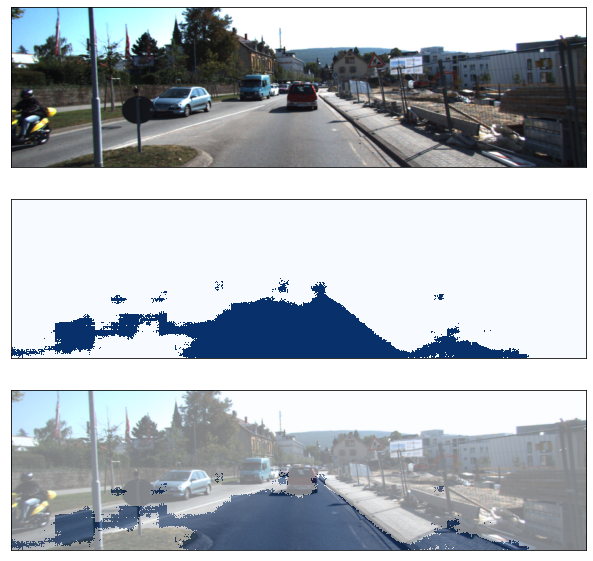

In [68]:
fig, axes = plt.subplots(3, 1, figsize=(21, 10))
fig.set_facecolor('white')

rand_num = np.random.choice(img_test.shape[0])
seg_test = model.predict(img_test[[rand_num]])

seg_test_mask = (seg_test[:, :, :, 1] > 0.5).astype(float)
    
axes[0].imshow(img_test[rand_num])
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(seg_test_mask[0], cmap='Blues')
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].imshow(img_test[rand_num])
axes[2].imshow(seg_test_mask[0], cmap='Blues', alpha=0.5)
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

(5) Now, we can segment images. Let's segment a highway image.

Download highway image from here

- Load highway image
- Print image shape (h, w, c)
- Segment it by your FCN model

In [69]:
highway = cv2.imread('./PS08_data_files_segmentation/highway.png') / 255.0

highway.shape

(320, 512, 3)

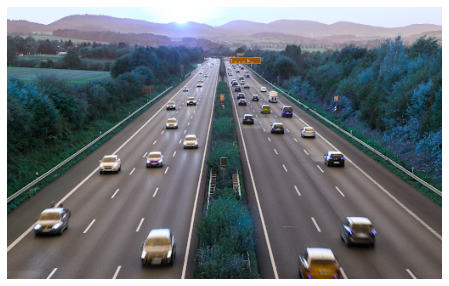

In [79]:
fig = plt.figure(figsize=(10, 5))
fig.set_facecolor('white')

plt.imshow(highway)
plt.axis('off')
plt.show()

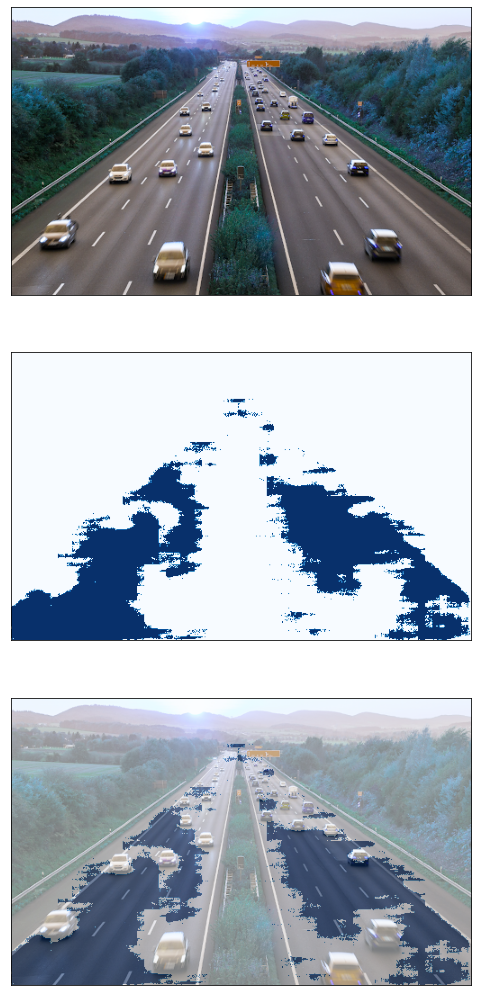

In [76]:
fig, axes = plt.subplots(3, 1, figsize=(21, 18))
fig.set_facecolor('white')

seg_test = model.predict(highway.reshape(-1, 320, 512, 3))
seg_test_mask = (seg_test[:, :, :, 1] > 0.5).astype(float)
    
axes[0].imshow(highway)
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(seg_test_mask[0], cmap='Blues')
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].imshow(highway)
axes[2].imshow(seg_test_mask[0], cmap='Blues', alpha=0.5)
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

(6) As you can see, the trained image and image in problem 3-(5) has a different shape. Is it possible to enter different shaped images to the same FCN model without reshaping? If yes, explain why it is possible

Yes, it is possible to enter different shaped images to the same FCN model without reshaping, after training with specific shaped images.
However, it's only because, when trasferring VGG19 model, I made the "include_top" parameter as False.
This parameter allows the model to be available to predict with any kind of input image's shape (except too small images that make maxpooling not possible).